# PyTorch Project
**Goal**: Create a neural network (multi-layer perceptron) to classify hand-written digits.

## Imports
- `torch`: PyTorch
- `torch.nn`: A part of PyTorch that deals specifically with neural network tools
- `torch.nn.functional`: A collection of functions that are useful in machine learning
- `torchvision.datasets`: Contains many common datasets for computer vision.
- `torch.optim`: Contains various optimizers for training the NN.
- `torchvision.transforms`: Contains useful "transform" layers that you can use to manipulate your data before applying any neural network.


In [9]:
## Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms as T

## Optional, for visualization purposes.
import matplotlib.pyplot as plt


## PyTorch Data Types

All data in PyTorch is represented using a data type called a *Tensor*.  
A tensor is a multi-dimensional array of data (entries in the array can be 32-bit floats, 64-bit floats, etc.)  
Tensors in PyTorch are almost exactly the same as NdArrays in NumPy.

In [10]:
## Example tensor
tensor = torch.tensor([[1,2],[3,4]])


## Representing Images as Tensors
We want our neural network to process (black and white) images.  
To feed these images into our neural network we first need to represent them as tensors, as all data must be represented as a tensor to be used in PyTorch.  
  
**Idea:** We can represent an image as a 2d grid, where the entries in the grid are the pixel values.

In [11]:
tensor = torch.ones((100,100))
tensor[30:50,30:50] = 0
# helpful function for showing an image
def show_image(image):
  plt.imshow(image, cmap='gray_r')
  plt.axis('off')
  plt.show()

In [12]:
# Create a basic image and visualize it
tensor

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

# Hyperparameters
Hyperparameters are parameters that you (the ML engineer) set in order to control the model.
The hyperparameters we'll use are:
- **Learning Rate**: Control how big the "steps" are during gradient descent
- **Hidden Layer Units**: Controls how many hidden units are in the hidden layer.

In [13]:
## Hyperparameters
LEARNING_RATE = 0.001
HIDDEN_LAYER_UNITS = 100

## Importing the data
We import the MNIST dataset from `torchvision.datasets`.

### Transforming the data
The data, as given, are actual images. In order to work with this in a neural network, we need to convert it to a tensor (array) of pixel values.

Thus, we first apply a `ToTensor()` transform which transforms each images into a 1x28x28 array of pixel values (the 1 is because these are grayscale images. If these were RGB it would be 3x28x28).

![img](https://umai.pro/transform_data.gif)

### `DataLoader`
PyTorch's `DataLoader` class acts as a wrapper around a `DataSet`, and allows you to seamlessly fetch data in batches, as well as shuffle the dataset to reduce overfitting.

In [14]:
# Fetching data and transform

train_dataset = datasets.MNIST('./data',train = True, download=True, transform = T.ToTensor())

test_dataset = datasets.MNIST('./data',train = False, download=True, transform = T.ToTensor())

train_loader = DataLoader(train_dataset, batch_size = 16)
test_loader = DataLoader(test_dataset, batch_size = 16)


100%|██████████| 9912422/9912422 [00:00<00:00, 28033754.05it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 20703417.16it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 12421205.82it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5512305.78it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



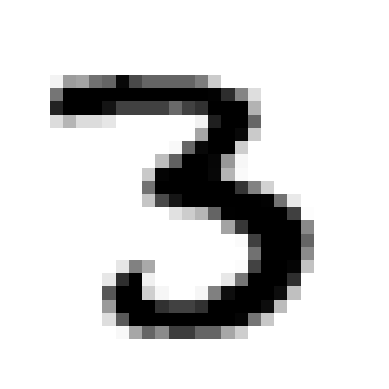

3

In [15]:
# Visualize an image in our dataset
show_image(train_dataset[12][0].squeeze())
train_dataset[12][1]

## Creating the NN
Models in pytorch are defined as a class. We extend `torch.nn.Module` to include all of pytorch's powerful features.

The structure is as follows:
### `__init__` (constructor):
Here we define the various 'layers' of our NN model. In this case we will have an input layer, 2 hidden layers, and an output layer. When we talk of 'layers', you can really think of them as separate, single-layer neural nets chained together.

### `forward`
Here, we defined what happens to the data as it goes through the network. This is broken down into the following steps:  
1. `flatten` the 28x28 array into a 784x1 array.   
2. Apply each layer in order, with a `relu` activation function after each.
3. Convert whatever numbers the network outputs into a probability, assigning a higher probability for higher output values. This is called `softmax`

In [16]:
# NN Module
class SimpleNN(nn.Module):

  def __init__(self):
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(784,HIDDEN_LAYER_UNITS) #input layer
    self.fc2 = nn.Linear(HIDDEN_LAYER_UNITS,HIDDEN_LAYER_UNITS) #hidden layer
    self.fc3 = nn.Linear(HIDDEN_LAYER_UNITS,10) #output layer

  def forward(self, x):
    x = torch.flatten(x , start_dim=1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)

    x = F.softmax(x, dim = 1)
    return x


## Creating An Instance of The Module
Next, we use the module we created to create a single neural network. If we wanted to have multiple networks (with the same structure), we'd instantiate this multiple times.

In [18]:
model = SimpleNN()

## Defining the Optimizer and Loss Function
The `optimizer` is what actually changes the weight values in the model. You pass in the model parameters that it will operate on, as well as a learning rate. The most basic optimizer is `SGD` (stochastic gradient descent) which operates using calculus. PyTorch offers a couple different optimizers (visualized below) that perform differently depending on your problem.
<br></br>

<img src="https://miro.medium.com/v2/1*47skUygd3tWf3yB9A10QHg.gif" width="300">

  
<br></br>
We also define a loss function which we will use to evaluate model predictions. For this task, Negative Log Likelihood (`NLLLoss`) is appropriate.
- **Idea**: encourage the model to assign a high probability to the correct label.

In [19]:
# Create the optimizer and loss_func

loss_func = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = LEARNING_RATE)

## Training/Validation Loop
Next, we loop over the training dataset (in batches), calculate the loss, the gradient (derivative), and adjust the weights.

Then we loop over the validation (test) dataset, take the highest probability label as the model's prediction, and see how many predictions it gets right. We report this as the accuracy.

We can run the above steps multiple times, each time we do so, it's known as a single 'epoch'. We continue doing this until the accuracy appears to level off.
<br></br>
<img src="https://umai.pro/training_cycle.gif">

In [20]:
# Training Loop
for epoch in range(5):
  for batch, (data, targets) in enumerate(train_loader):
    optimizer.zero_grad()

    out = model(data)
    loss = loss_func(torch.log(out),targets)

    loss.backward()
    optimizer.step()

#Testing loop
  correct =0
  for batch, (data, targets) in enumerate(test_loader):
    out = model(data)
    best_guesses = out.argmax(dim=1)
    correct_now =(targets == best_guesses)
    correct += correct_now.sum()
  print(correct/len(test_dataset))

tensor(0.5347)
tensor(0.7626)
tensor(0.8328)
tensor(0.8659)
tensor(0.8846)


## Using our Model
Now that we have trained a model, we can use it for handwritten digit recognition! For this demo we use a model we trained earlier today to save time.

tensor([3])


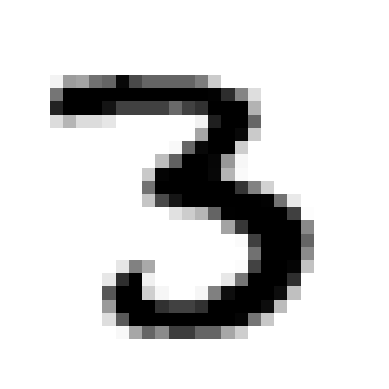

In [21]:
# visualizing an image
sample_image = train_dataset[12][0]
out = model(sample_image)
print(out.argmax(dim=1))
show_image(sample_image.squeeze())
#print(train_dataset[12][0])
# show_image(sample_image)

Our simple model (trained for 50 epochs) has over 93% accuracy!

In [25]:
correct = 0
for batch, (data, targets) in enumerate(test_loader):
    out = model(data)
    best_guesses = out.argmax(dim=1) # this just takes the maximum probability label as the predicted label
    correct += (best_guesses==targets).sum()

print(f'Test Correct: {correct/len(test_dataset)}')

Test Correct: 0.8845999836921692
